In [1]:
# DMW Assignment 
#implementation of generalisation ability of svm based on markov sampling
#Magic Dataset 
#Done by 
#iit2018117 (Palak Mittal)
#iit2018119 (Nehal Singh)
#iit2018187 (Abhishek Kumar Gupta)
#iit2018191 (Puja Kumari)
#iit2018195 (Prabha Kumari)



#importing library
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [148]:
#importing dataset of letter recognisation
Data = pd.read_csv("/content/Magic.csv")

In [149]:
#description of that dataset

# 1.dimensions
print("1.shape of dataset (Dimension): ", Data.shape, "\n")
# 2.datatype
print("2. data Information \n")
print(Data.info())
# 3.real look
Data = Data.sample(frac=1,random_state=42).reset_index(drop=True)
Data=Data.drop(['Unnamed: 0'],axis = 1)
Data.head()

1.shape of dataset (Dimension):  (19020, 12) 

2. data Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19020 non-null  int64  
 1   fLength     19020 non-null  float64
 2   fWidth      19020 non-null  float64
 3   fSize       19020 non-null  float64
 4   fConc       19020 non-null  float64
 5   fConc1      19020 non-null  float64
 6   fAsym       19020 non-null  float64
 7   fM3Long     19020 non-null  float64
 8   fM3Trans    19020 non-null  float64
 9   fAlpha      19020 non-null  float64
 10  fDist       19020 non-null  float64
 11  class       19020 non-null  object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB
None


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,h
1,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,g
2,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,g
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,h
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,h


In [150]:
#printing cloumn names
print(Data.columns) 

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')


In [151]:
#printing letters in order
m=len(Data['class'])
count0=0
for i in range(m):
  # print(Data['letter'][i])
  if ord(Data['class'][i])==ord('g'):
    # label.append(1)
    Data['class'][i]=1
    count0+=1
  else:
    if ord(Data['class'][i])==ord('h'):
    # label.append(-1) 
     Data['class'][i]=-1  
print(count0)
oreder_sequence = list(np.sort(Data['class'].unique()))
print(oreder_sequence)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


12332
[-1, 1]


In [152]:
Data_train=Data.sample(frac=0.666667)
Data_test = Data.drop(Data_train.index)
# Data_train=Data_train.sample(n=2000,replace='False')
print(Data_train.shape)
Data_train.head()

(12680, 11)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
3323,69.9328,24.5931,3.1355,0.1816,0.1007,-90.9638,47.6857,6.7437,1.8664,270.8220,1
15927,40.9586,17.5945,2.7955,0.2802,0.1817,-7.9106,21.8974,-8.4883,2.9065,171.9550,1
15411,72.3434,24.8566,2.8069,0.2761,0.1396,41.1614,77.3764,-9.0058,79.8860,87.5884,1
5100,40.3810,23.8161,2.8069,0.2632,0.1517,-15.4082,36.5620,15.0864,6.8587,87.1968,-1
3473,36.9879,14.5757,2.5466,0.4056,0.1948,4.4752,8.1027,14.0264,81.9143,182.4165,-1


In [153]:

count0=0
kl=len(Data_train)
print(kl)
for x in Data_train['class']:
  if x==1:
    count0+=1
print(count0)


12680
8193


In [169]:
def svm_random(Data_train):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  while pp<20:
    Data_random=Data_train.sample(n=500,random_state=pp+1)
    X_train = Data_random.drop(['class'],axis = 1)
    y_train = Data_random['class']
    y_train=y_train.astype('int')
    X_test = Data_test.drop(['class'],axis = 1)
    y_test =  Data_test['class']
    y_test=y_test.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    pp+=1
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
  plt.title("misclassification graph for random")  
  plt.xlabel("X axis")  
  plt.ylabel("Y axis")  
  plt.plot(np.arange(1,21), accs, color ="red")  
  plt.show()
  return 100*np.mean(accs),100*np.std(accs)

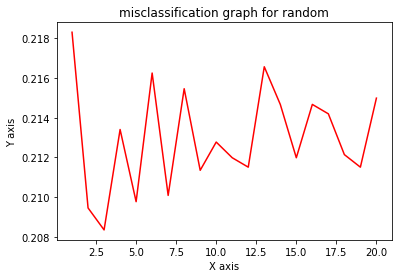

mean misclassification rate for random sample with std (21.297318611987382, 0.2561270889440842)


In [171]:
print("mean misclassification rate for random sample with std",svm_random(Data_train))

In [161]:
def loss(f,z):
  if f*z>1:
    return 0
  else:
    return (1-f*z)

In [162]:
import math
#here is main Algorithm proposed in the paper
def markovsampling(df):
  linear_model = SVC(kernel='linear')
  dtr=df.copy()
  X_train = dtr.drop(['class'],axis = 1)
  y_train = dtr['class']
  y_train=y_train.astype('int')
  linear_model.fit(X_train,y_train)
  sample = df[0:0]
  m0=0
  m1=0
  zt=dtr.sample(n=1)
  ztl=zt.to_numpy()
  id=len(sample)
  sample = sample.append(pd.DataFrame(ztl,index=[id+1],columns=sample.columns))
  dtr=dtr.drop(zt.index)
  yl=zt['class'].to_numpy()
  yt=yl[0]
  if yt==-1:
    m0+=1
  else:
    m1+=1
  ydt=linear_model.predict(zt.drop(['class'],axis = 1))
  kvalmax=10
  kval=0
  while (m0<m/2 or m1<m/2) and len(dtr)>0:
    id=len(sample)
    zst=dtr.sample(n=1)
    zstl=zst.to_numpy()
    dtr=dtr.drop(zst.index)
    ysl=zst['class'].to_numpy()
    yst=ysl[0]
    ydst=linear_model.predict(zst.drop(['class'],axis = 1))
    pr=math.exp(-loss(ydst,ydst))/math.exp(-loss(ydt,yt))
    if pr==1 and yt==-1 and yst==-1:
      sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
    elif pr==1 and yt==1 and yst==1:
      sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
    elif (pr==1 and yt*yst==-1) or pr<0:
      sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
    elif pr>1:
      sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
    elif kval==kvalmax:
      sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      kval=0
    else:
      kval+=1
    zt=zst
    if yst==-1:
     m0+=1
    else:
     m1+=1
  return sample
    


In [172]:
def svm_markov(Data_train):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  while pp<20:
    dtr=Data_train.sample(n=500)
    dtr.reset_index(drop=True, inplace=True)  
    Data_markov=markovsampling(dtr)
    # print(Data_markov.shape)
    X_train = Data_markov.drop(['class'],axis = 1)
    y_train = Data_markov['class']
    y_train=y_train.astype('int')
    X_test = Data_test.drop(['class'],axis = 1)
    y_test =  Data_test['class']
    y_test=y_test.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
    pp+=1
  plt.title("misclassification graph for markov")  
  plt.xlabel("X axis")  
  plt.ylabel("Y axis")  
  plt.plot(np.arange(1,21), accs, color ="red")  
  plt.show()
  return 100*np.mean(accs),100*np.std(accs)

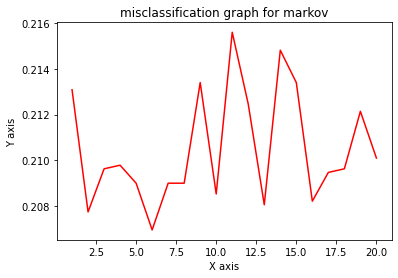

mean misclassification rate for markov sample (21.04968454258675, 0.24574694356243504)


In [174]:
print("mean misclassification rate for markov sample",svm_markov(Data_train))